In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/'):
    for filename in filenames:
        cnt+=1
        #print(os.path.join(dirname, filename))
print ('number of files in no folder', cnt)

cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/'):
    for filename in filenames:
        cnt+=1
        #print(os.path.join(dirname, filename))
print ('number of files in yes folder', cnt)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

number of files in no folder 98
number of files in yes folder 155


Look at images

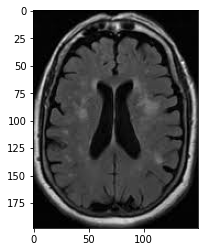

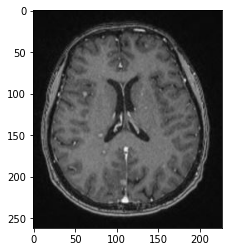

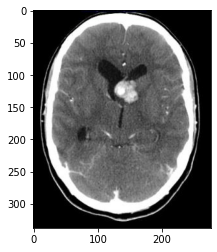

In [34]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/'):
    for filename in filenames:
        cnt+=1
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path)
        plt.imshow(img,cmap='gray')
        plt.show()
        if cnt > 2:
            break


<class 'numpy.ndarray'>


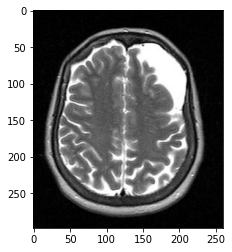

<class 'numpy.ndarray'>


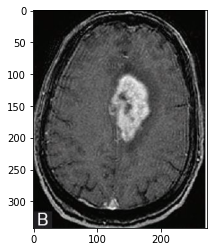

<class 'numpy.ndarray'>


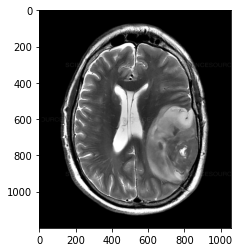

In [35]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/'):
    for filename in filenames:
        cnt+=1
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path)
        print (type(img))
        plt.imshow(img,cmap='gray')
        plt.show()
        if cnt > 2:
            break

In [36]:
#label for yes = 0, label for no = 1

desired_width = 228
desired_height = 228

img_list = []
label_list = []
cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/'):
    for filename in filenames:
        cnt+=1
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, (desired_width,desired_height))
        img_list.append(resized_img/255.0)
        label_list.append(0)        
        #print (type(img))
        #plt.imshow(img,cmap='gray')
        #plt.show()


print ('len(img_list)',len(img_list))
print ('len(label_list)',len(label_list))

len(img_list) 155
len(label_list) 155


In [37]:
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/'):
    for filename in filenames:
        cnt+=1
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, (desired_width,desired_height))
        img_list.append(resized_img/255.0)
        label_list.append(1)        
        #print (type(img))
        #plt.imshow(img,cmap='gray')
        #plt.show()


print ('len(img_list)',len(img_list))
print ('len(label_list)',len(label_list))

len(img_list) 253
len(label_list) 253


In [38]:
import numpy as np
img_list = np.asarray(img_list).astype(np.float32)
print (img_list.shape)

(253, 228, 228, 3)


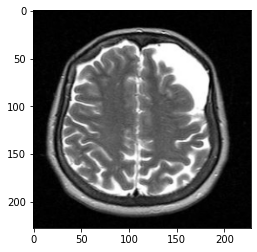

In [39]:
plt.imshow(img_list[0])

In [40]:
img_list[1].shape

(228, 228, 3)

In [41]:
img_list[0]

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0

In [42]:
label_list =np.asarray(label_list)
print (label_list.shape)

(253,)


In [43]:
label_list[:5]

array([0, 0, 0, 0, 0])

In [44]:
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical

category_label = to_categorical(label_list,num_classes=2)
print(category_label[:5])
print(category_label[-5:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(img_list,category_label,test_size=0.3)

print ('x_train.shape',x_train.shape)

x_train.shape (177, 228, 228, 3)


In [46]:
y_train.shape

(177, 2)

In [47]:
from keras.preprocessing.image import ImageDataGenerator

train_datagenerator_transforms = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               #rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.51, # Shear means cutting away part of the image (max 15%)
                               zoom_range=0.15, # Zoom in by 15% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value)
                                  )



test_datagenerator_transforms = ImageDataGenerator()
                                   
batch_size = 10
train_generator = train_datagenerator_transforms.flow(x_train, y_train, batch_size=batch_size)
valid_generator = train_datagenerator_transforms.flow(x_test, y_test, batch_size=batch_size)
test_generator = test_datagenerator_transforms.flow(x_test, batch_size=1)


#with out image generator,
# same 180 images will be used for each epoch

# when using image generator, different (transformed) set of 180 images will be used for each epoch
# number of images will be same for each epoch (180)
# but after all epochs, total number of images used for training will be more since each epoch might have used a 
# different set of transformed image

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, Dense, Flatten, BatchNormalization, Dropout

brain_model = Sequential()
brain_model.add(Conv2D(32,5,input_shape=(228,228,3), activation='relu'))
brain_model.add(BatchNormalization())
brain_model.add(MaxPool2D(2,2))
brain_model.add(Dropout(0.5))

brain_model.add(Conv2D(64,5, activation='relu'))
brain_model.add(BatchNormalization())
brain_model.add(MaxPool2D(2,2))

brain_model.add(Dropout(0.5))

brain_model.add(Flatten())
brain_model.add(Dense(1000,activation='relu'))
brain_model.add(Dropout(0.5))
brain_model.add(Dense(500,activation='relu'))
brain_model.add(Dropout(0.5))
brain_model.add(Dense(2,activation='softmax'))

brain_model.summary()

brain_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      2432      
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      51264     
_________________________________________________________________
batch_normalization_3 (Batch (None, 108, 108, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)       

In [49]:
##with out using validation data 
#epochs=30
##batch_size =10 earlier
#steps_per_epoch = x_train.shape[0]/batch_size
#brain_model.fit_generator(train_generator,steps_per_epoch =steps_per_epoch, epochs=epochs)

# Epoch 1/30
# 17/17 [==============================] - 22s 1s/step - loss: 96.1885 - accuracy: 0.5650
# Epoch 2/30
# 17/17 [==============================] - 21s 1s/step - loss: 71.5215 - accuracy: 0.6328
# Epoch 3/30
# 17/17 [==============================] - 20s 1s/step - loss: 85.7366 - accuracy: 0.6836
# Epoch 4/30
# 17/17 [==============================] - 20s 1s/step - loss: 61.4686 - accuracy: 0.6328
# Epoch 5/30
# 17/17 [==============================] - 20s 1s/step - loss: 48.9970 - accuracy: 0.6271
# Epoch 6/30
# 17/17 [==============================] - 20s 1s/step - loss: 37.6738 - accuracy: 0.7345
# Epoch 7/30
# 17/17 [==============================] - 20s 1s/step - loss: 42.7681 - accuracy: 0.7006
# Epoch 8/30
# 17/17 [==============================] - 21s 1s/step - loss: 47.5197 - accuracy: 0.6384
# Epoch 9/30
# 17/17 [==============================] - 20s 1s/step - loss: 29.7865 - accuracy: 0.6893
# Epoch 10/30
# 17/17 [==============================] - 20s 1s/step - loss: 26.0381 - accuracy: 0.6949
# Epoch 11/30
# 17/17 [==============================] - 20s 1s/step - loss: 20.9801 - accuracy: 0.6497
# Epoch 12/30
# 17/17 [==============================] - 20s 1s/step - loss: 17.0590 - accuracy: 0.6949
# Epoch 13/30
# 17/17 [==============================] - 20s 1s/step - loss: 16.5836 - accuracy: 0.6893
# Epoch 14/30
# 17/17 [==============================] - 20s 1s/step - loss: 10.7945 - accuracy: 0.6441
# Epoch 15/30
# 17/17 [==============================] - 20s 1s/step - loss: 7.7913 - accuracy: 0.7175
# Epoch 16/30
# 17/17 [==============================] - 20s 1s/step - loss: 9.8487 - accuracy: 0.6384
# Epoch 17/30
# 17/17 [==============================] - 20s 1s/step - loss: 9.1693 - accuracy: 0.6045
# Epoch 18/30
# 17/17 [==============================] - 20s 1s/step - loss: 8.0178 - accuracy: 0.6215
# Epoch 19/30
# 17/17 [==============================] - 20s 1s/step - loss: 4.7761 - accuracy: 0.7175
# Epoch 20/30
# 17/17 [==============================] - 20s 1s/step - loss: 4.0705 - accuracy: 0.7119
# Epoch 21/30
# 17/17 [==============================] - 20s 1s/step - loss: 4.1269 - accuracy: 0.6780
# Epoch 22/30
# 17/17 [==============================] - 20s 1s/step - loss: 3.7310 - accuracy: 0.6949
# Epoch 23/30
# 17/17 [==============================] - 20s 1s/step - loss: 3.2115 - accuracy: 0.6667
# Epoch 24/30
# 17/17 [==============================] - 20s 1s/step - loss: 2.9921 - accuracy: 0.6667
# Epoch 25/30
# 17/17 [==============================] - 20s 1s/step - loss: 2.2810 - accuracy: 0.6949
# Epoch 26/30
# 17/17 [==============================] - 20s 1s/step - loss: 2.3144 - accuracy: 0.6554
# Epoch 27/30
# 17/17 [==============================] - 20s 1s/step - loss: 1.4686 - accuracy: 0.6610
# Epoch 28/30
# 17/17 [==============================] - 20s 1s/step - loss: 1.7063 - accuracy: 0.6723
# Epoch 29/30
# 17/17 [==============================] - 20s 1s/step - loss: 1.6212 - accuracy: 0.6723
# Epoch 30/30
# 17/17 [==============================] - 20s 1s/step - loss: 1.2618 - accuracy: 0.6554


In [50]:
#using validation data
epochs=30
#batch_size =10 earlier
steps_per_epoch = x_train.shape[0]/batch_size
validation_steps = x_test.shape[0]/batch_size
brain_model.fit_generator(train_generator,steps_per_epoch =steps_per_epoch, epochs=epochs, validation_data =valid_generator , validation_steps=validation_steps)

#with out image generator,
# same 180 images will be used for each epoch

# when using image generator, different (transformed) set of 180 images will be used for each epoch
# number of images will be same for each epoch (180)
# but after all epochs, total number of images used for training will be more since each epoch might have used a 
# different set of transformed image

Epoch 1/30
17/17 [==============================] - 24s 1s/step - loss: 62.6480 - accuracy: 0.5650 - val_loss: 8.4143 - val_accuracy: 0.3684
Epoch 2/30
17/17 [==============================] - 22s 1s/step - loss: 68.9442 - accuracy: 0.6215 - val_loss: 4.0057 - val_accuracy: 0.7632
Epoch 3/30
17/17 [==============================] - 22s 1s/step - loss: 53.5648 - accuracy: 0.6215 - val_loss: 12.6609 - val_accuracy: 0.5658
Epoch 4/30
17/17 [==============================] - 23s 1s/step - loss: 50.9941 - accuracy: 0.6102 - val_loss: 11.2349 - val_accuracy: 0.7105
Epoch 5/30
17/17 [==============================] - 23s 1s/step - loss: 59.6594 - accuracy: 0.6215 - val_loss: 13.9406 - val_accuracy: 0.4605
Epoch 6/30
17/17 [==============================] - 23s 1s/step - loss: 55.9686 - accuracy: 0.5706 - val_loss: 31.8273 - val_accuracy: 0.6974
Epoch 7/30
17/17 [==============================] - 23s 1s/step - loss: 30.4877 - accuracy: 0.6158 - val_loss: 14.6428 - val_accuracy: 0.7105
Epoch 8/

In [51]:
#epochs=3
#batch_size =10 earlier
#steps_per_epoch = 200
#brain_model.fit_generator(train_generator,steps_per_epoch =steps_per_epoch, epochs=epochs)
#using a higher steps_per_epoch than the images/batch_size does not seem to work. that always ends after 1 epoch
# Epoch 1/3
# 200/200 [==============================] - 20s 94ms/step - loss: 1.1413 - accuracy: 0.7062
# <keras.callbacks.History at 0x7f07100258d0>

In [52]:
#predict_test = brain_model.predict(x_test)
predict_test = brain_model.predict_generator(test_generator)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [53]:
predict_test.shape

(76, 2)

In [54]:
predict_test

array([[1.89513817e-01, 8.10486138e-01],
       [6.75090671e-01, 3.24909329e-01],
       [9.33572471e-01, 6.64274916e-02],
       [6.02152169e-01, 3.97847921e-01],
       [9.91493702e-01, 8.50621704e-03],
       [7.62722790e-01, 2.37277225e-01],
       [9.88296688e-01, 1.17032565e-02],
       [7.80714571e-01, 2.19285384e-01],
       [9.02580380e-01, 9.74196643e-02],
       [6.00684822e-01, 3.99315149e-01],
       [9.71563339e-01, 2.84366123e-02],
       [8.26020956e-01, 1.73979029e-01],
       [9.98549044e-01, 1.45094655e-03],
       [9.98085976e-01, 1.91402889e-03],
       [7.60216832e-01, 2.39783153e-01],
       [6.78328514e-01, 3.21671486e-01],
       [3.78335476e-01, 6.21664524e-01],
       [9.33572471e-01, 6.64274916e-02],
       [1.00000000e+00, 4.34350049e-24],
       [1.33990978e-08, 1.00000000e+00],
       [3.28092307e-01, 6.71907723e-01],
       [3.39228153e-01, 6.60771847e-01],
       [9.57166910e-01, 4.28331234e-02],
       [9.34645176e-01, 6.53547719e-02],
       [3.445283

In [55]:
max_pred= predict_test.argmax(axis=1)
max_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [56]:
y_true = y_test.argmax(axis=1)
y_true

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [57]:
from sklearn.metrics import accuracy_score
a = accuracy_score(max_pred,y_true)
a

0.5

In [58]:
# just understanding existing data
# label for yes = 0, label for no = 1
# 1st 5 images are yes, 2nd 5 are no

print(category_label[:5])
print(category_label[-5:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


true_label 1
preditect_label 1
y_test [0. 1.]
predict_test [0.18951382 0.81048614]


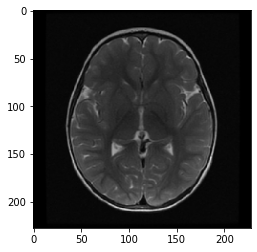

true_label 0
preditect_label 0
y_test [1. 0.]
predict_test [0.6750907  0.32490933]


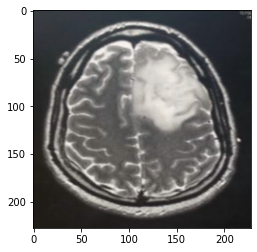

true_label 1
preditect_label 0
y_test [0. 1.]
predict_test [0.9335725  0.06642749]


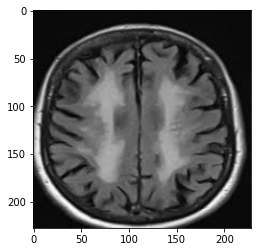

true_label 0
preditect_label 0
y_test [1. 0.]
predict_test [0.60215217 0.39784792]


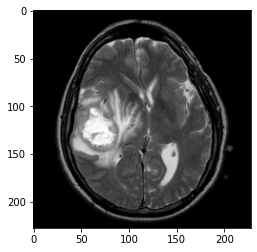

true_label 0
preditect_label 0
y_test [1. 0.]
predict_test [0.9914937  0.00850622]


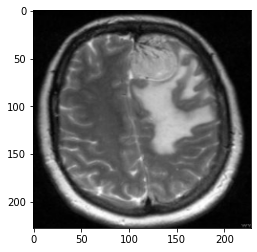

In [59]:
for i in range(5):
    img = x_test[i]
    true_label = y_true[i]
    preditect_label = max_pred[i]
    print ('true_label',true_label)
    print ('preditect_label',preditect_label)
    
    print ('y_test',y_test[i])
    print ('predict_test',predict_test[i])
    plt.imshow(img)
    plt.show()